# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
# Importamos librerias necesarias para el proyecto
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display, HTML
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot


In [2]:
# Cargar los datos
file_path = 'datasets/taxi.csv'
data = pd.read_csv(file_path, index_col=0, parse_dates=[0])


In [3]:
# Visualizar los primeros registros
display(data.head())

# Resumir la información del DataFrame
print(data.info())

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


In [4]:
# Remuestrear los datos a intervalos de una hora
data_resampled = data.resample('H').sum()

# Visualizar los datos remuestreados
display(data_resampled.head())

print(data_resampled.info())

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


## Análisis

In [5]:
# Descriptiva de los datos
print("Estadísticas descriptivas de los datos remuestreados:")
display(data_resampled.describe())

Estadísticas descriptivas de los datos remuestreados:


,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


In [6]:
# Por temas de visualizacion vamos a reducir los datos a mostrados a un mes

start_date = '2018-03-01'
end_date = '2018-03-01'
data_subset = data_resampled[start_date:end_date]

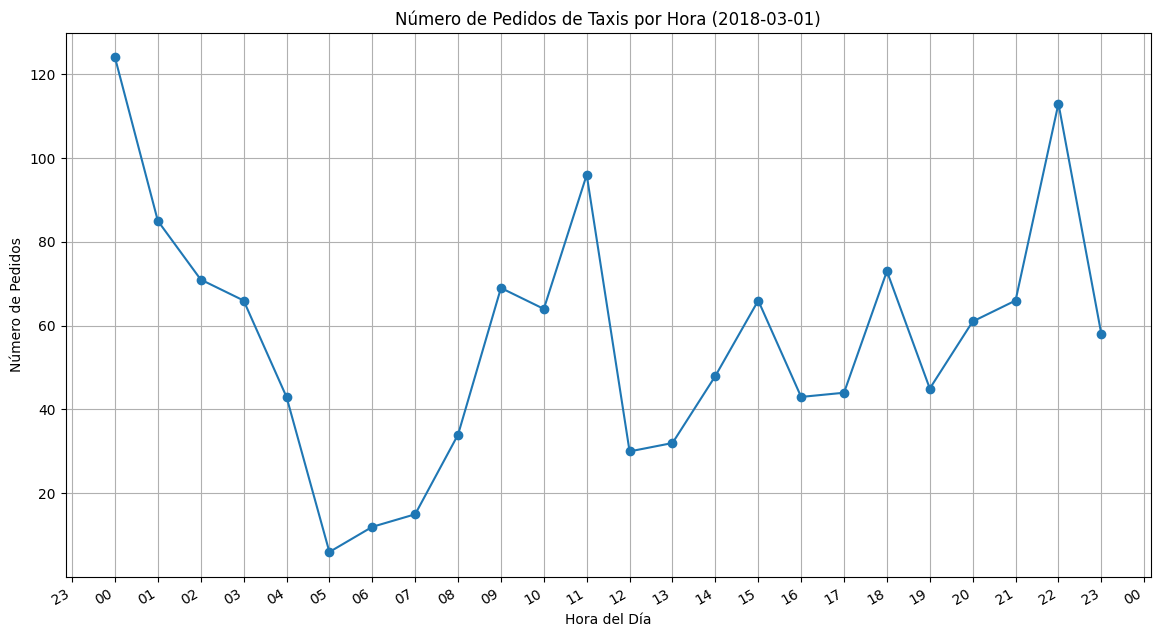

In [7]:
# Filtrar datos para un día específico (por ejemplo, 2018-03-01)
specific_day = '2018-03-01'
data_day = data_resampled.loc[specific_day]

plt.figure(figsize=(14, 8))
plt.plot(data_day.index, data_day['num_orders'], marker='o')
plt.title(f'Número de Pedidos de Taxis por Hora ({specific_day})')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.grid(True)
# Formatear las etiquetas del eje X para que muestren solo la hora
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gcf().autofmt_xdate()  # Ajustar automáticamente el formato de la fecha

plt.show()



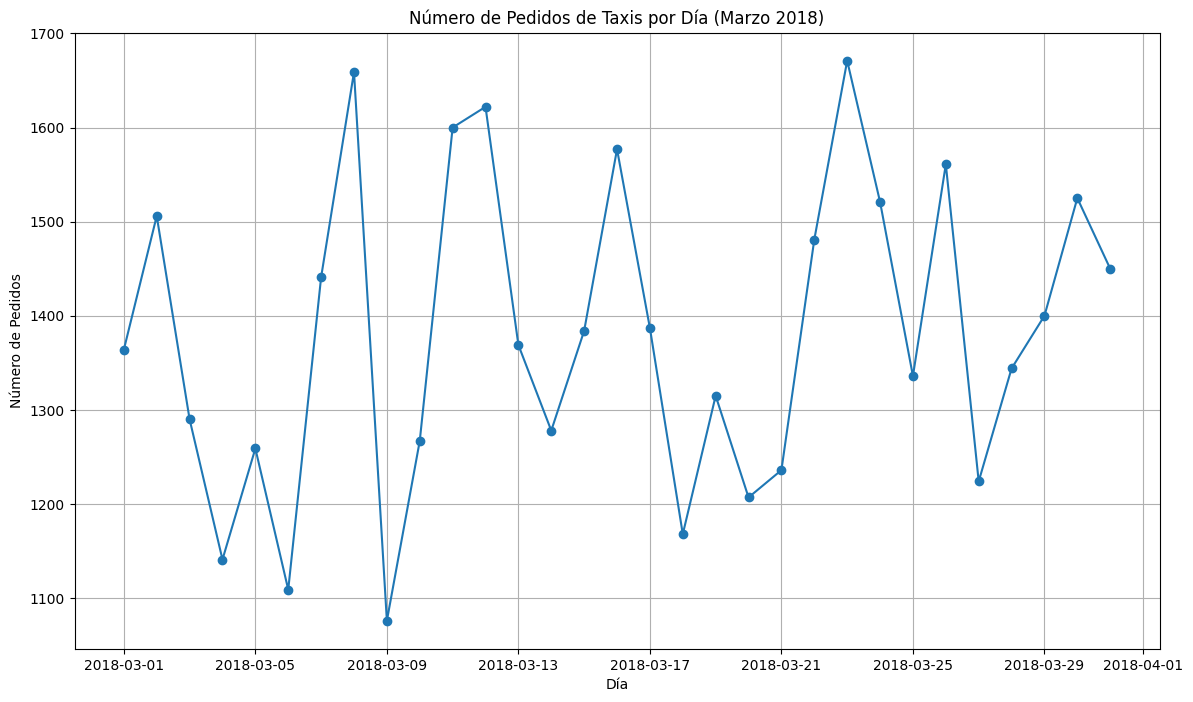

In [8]:
# Gráfica 2: Total de Pedidos por Día durante un Mes
start_date = '2018-03-01'
end_date = '2018-03-31'
data_month = data_resampled.loc[start_date:end_date]
data_daily = data_month.resample('D').sum()

plt.figure(figsize=(14, 8))
plt.plot(data_daily.index, data_daily['num_orders'], marker='o')
plt.title(f'Número de Pedidos de Taxis por Día (Marzo 2018)')
plt.xlabel('Día')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

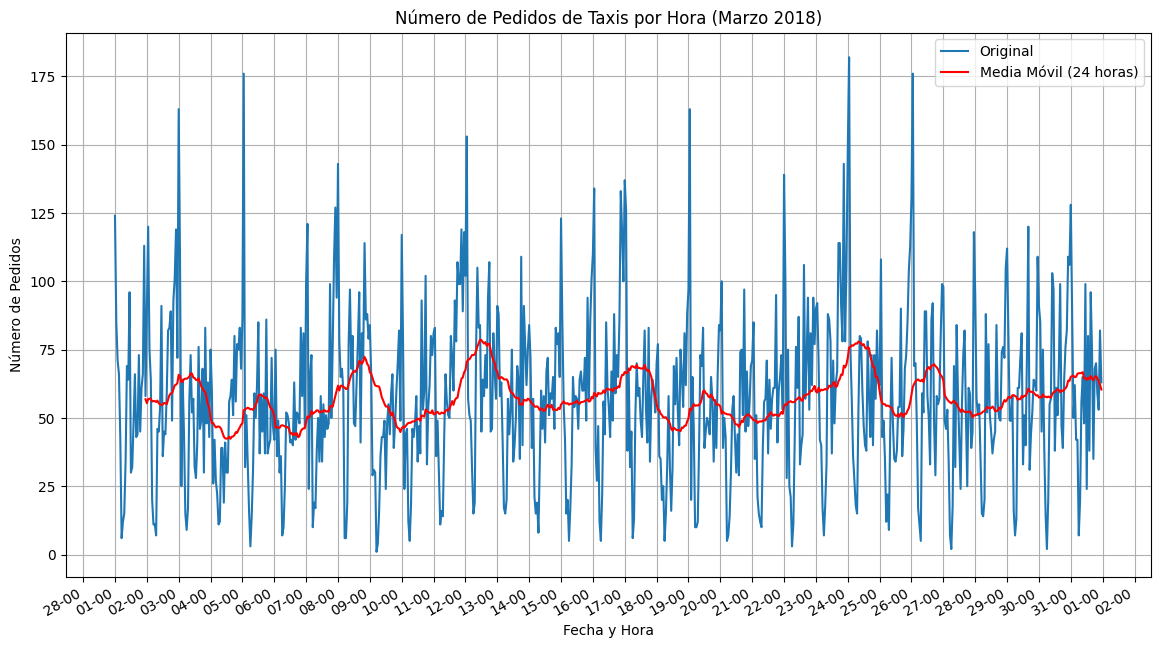

In [9]:
# Suavizado con media móvil
window_size = 24  # Ventana de 24 horas
data_smoothed = data_month['num_orders'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 8))
plt.plot(data_month.index, data_month['num_orders'], label='Original')
plt.plot(data_month.index, data_smoothed, label=f'Media Móvil ({window_size} horas)', color='red')
plt.title('Número de Pedidos de Taxis por Hora (Marzo 2018)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Pedidos')
plt.legend()
plt.grid(True)
# Formatear las etiquetas del eje X para que muestren solo el día y la hora
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()  # Ajustar automáticamente el formato de la fecha

plt.show()

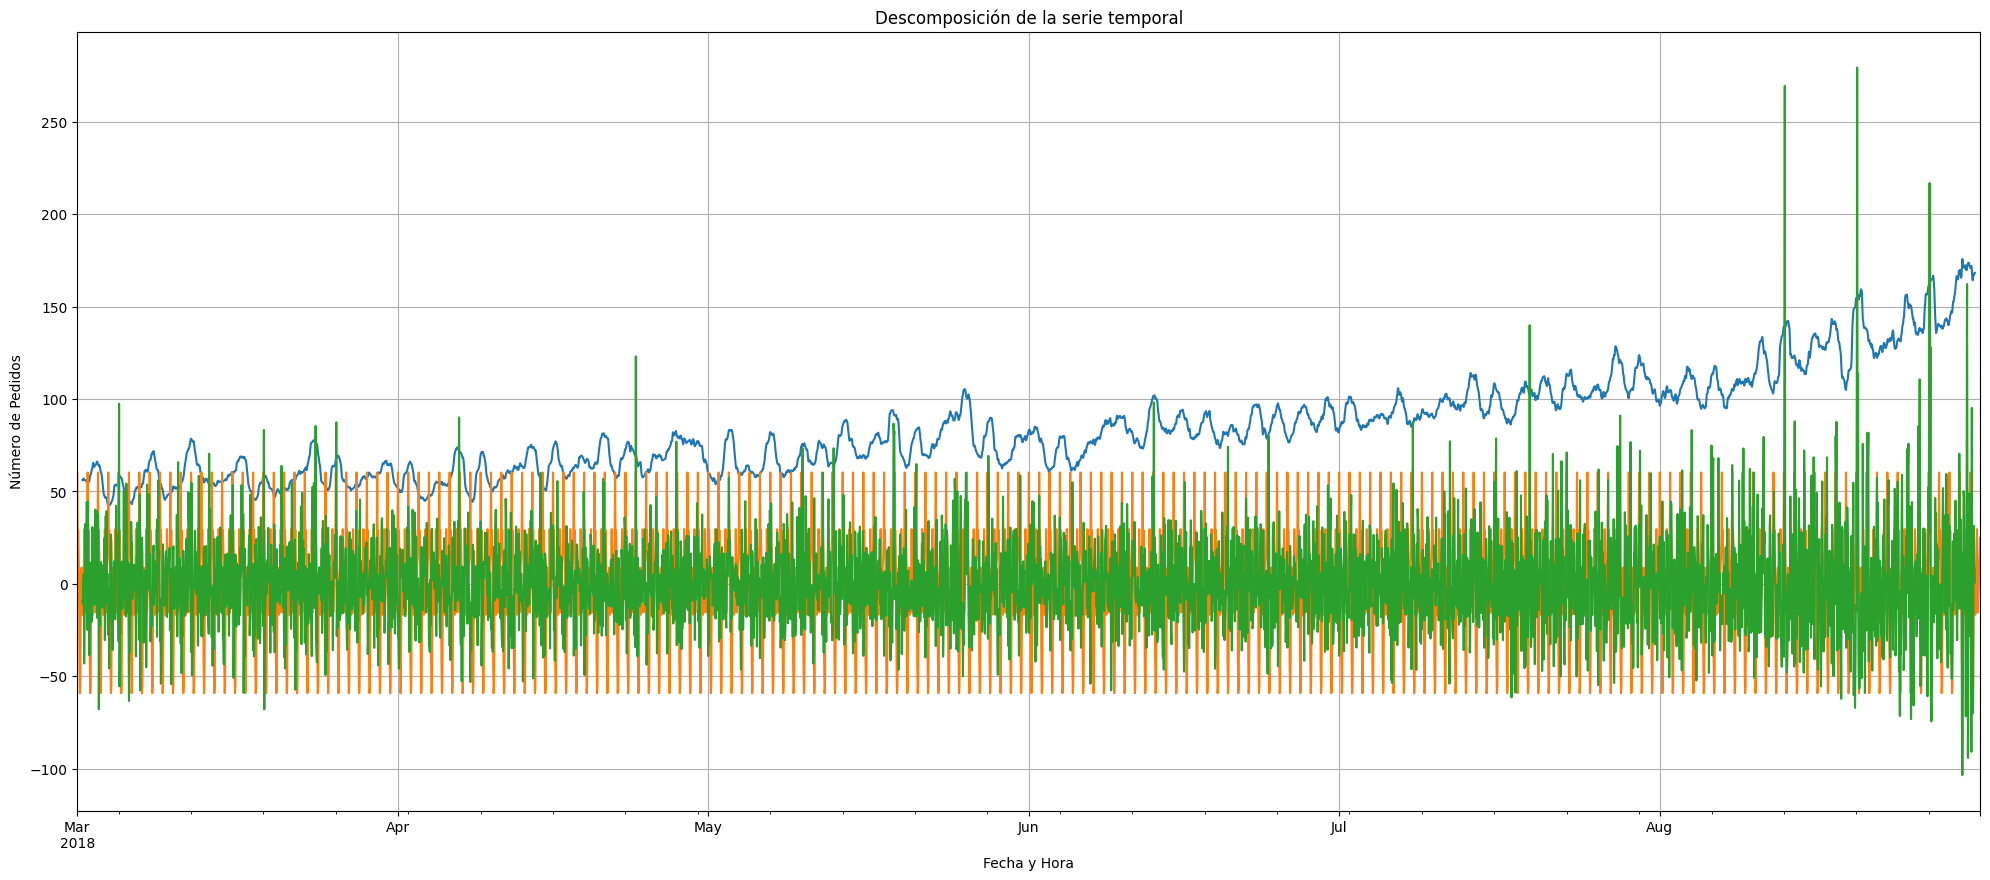

In [10]:
plt.figure(figsize=(20, 25))
result = seasonal_decompose(data_resampled['num_orders'], model='additive', period=24)

plt.subplot(3, 1, 3)
result.trend.plot()
result.seasonal.plot()
result.resid.plot()
plt.title('Descomposición de la serie temporal')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Pedidos')
plt.grid(True)

plt.tight_layout()
plt.show()

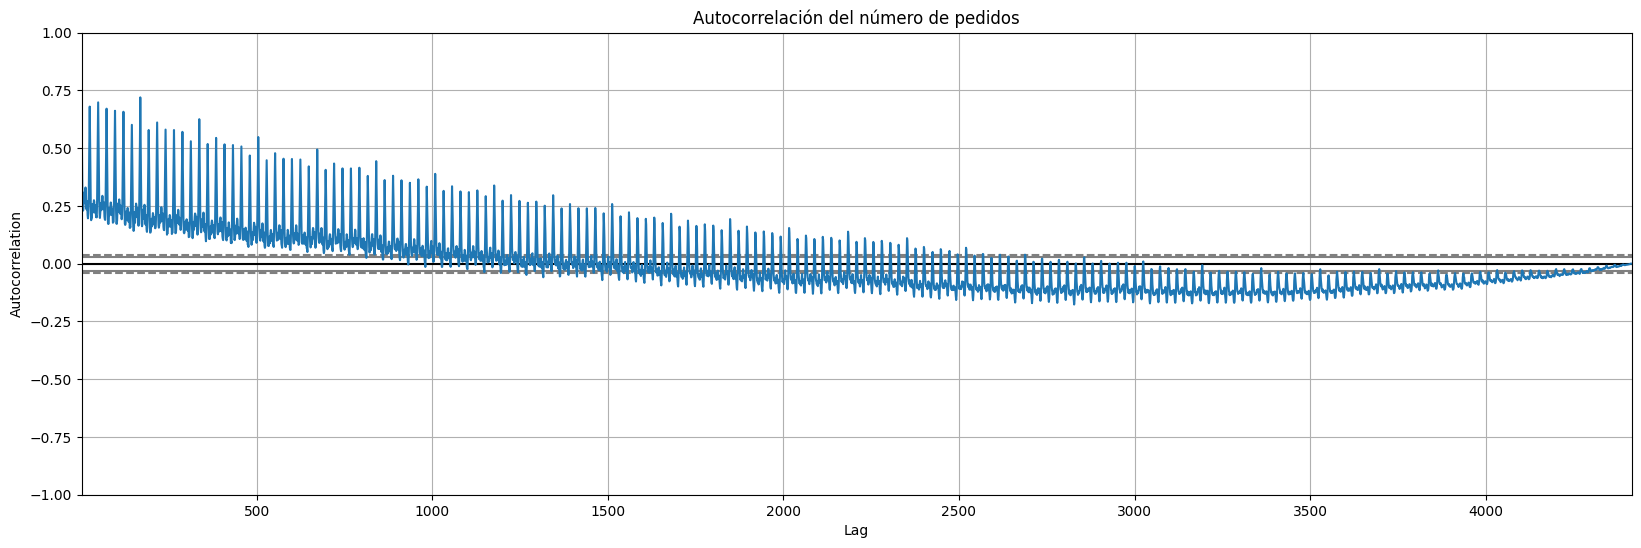

In [11]:
plt.figure(figsize=(20, 6))
autocorrelation_plot(data_resampled['num_orders'])
plt.title('Autocorrelación del número de pedidos')
plt.show()


## Formación

## Prueba

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48